In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings .filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Users\Dhanusha\Downloads\mcdonalds.csv")

In [3]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
data.shape

(1453, 15)

In [5]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
           'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
MD_x = data[columns]
label_encoder = LabelEncoder()
MD_x = MD_x.apply(label_encoder.fit_transform)
column_means = MD_x.mean().round(2)
for i, mean in enumerate(column_means):
    print(f"Column {i+1}: {mean:.2f}")


Column 1: 0.55
Column 2: 0.91
Column 3: 0.09
Column 4: 0.87
Column 5: 0.53
Column 6: 0.90
Column 7: 0.60
Column 8: 0.64
Column 9: 0.36
Column 10: 0.20
Column 11: 0.24


In [7]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
n_components = len(explained_var)
for i in range(n_components):
    print(f"PC{i+1} - Standard deviation: {np.sqrt(pca.explained_variance_[i]):.5f}")
    print(f"PC{i+1} - Proportion of Variance: {explained_var[i]:.5f}")
    print(f"PC{i+1} - Cumulative Proportion: {cumulative_var[i]:.5f}")
    print()

PC1 - Standard deviation: 0.75705
PC1 - Proportion of Variance: 0.29945
PC1 - Cumulative Proportion: 0.29945

PC2 - Standard deviation: 0.60746
PC2 - Proportion of Variance: 0.19280
PC2 - Cumulative Proportion: 0.49224

PC3 - Standard deviation: 0.50462
PC3 - Proportion of Variance: 0.13305
PC3 - Cumulative Proportion: 0.62529

PC4 - Standard deviation: 0.39880
PC4 - Proportion of Variance: 0.08310
PC4 - Cumulative Proportion: 0.70839

PC5 - Standard deviation: 0.33741
PC5 - Proportion of Variance: 0.05948
PC5 - Cumulative Proportion: 0.76787

PC6 - Standard deviation: 0.31027
PC6 - Proportion of Variance: 0.05030
PC6 - Cumulative Proportion: 0.81817

PC7 - Standard deviation: 0.28970
PC7 - Proportion of Variance: 0.04385
PC7 - Cumulative Proportion: 0.86201

PC8 - Standard deviation: 0.27512
PC8 - Proportion of Variance: 0.03955
PC8 - Cumulative Proportion: 0.90156

PC9 - Standard deviation: 0.26525
PC9 - Proportion of Variance: 0.03676
PC9 - Cumulative Proportion: 0.93832

PC10 - Sta

In [8]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
print("Standard deviations:")
print(np.round(np.sqrt(pca.explained_variance_), decimals=1))
print("\nRotation (n x k):")
rotation_matrix = np.round(pca.components_, decimals=2)
column_names = ['PC' + str(i+1) for i in range(rotation_matrix.shape[0])]
row_names = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
             'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
rotation_df = pd.DataFrame(rotation_matrix, columns=column_names, index=row_names)
print(rotation_df)

Standard deviations:
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]

Rotation (n x k):
             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy      -0.48 -0.16 -0.01  0.12  0.30 -0.11 -0.34 -0.47  0.33 -0.21  0.37
convenient  0.36  0.02  0.02 -0.03 -0.06 -0.09 -0.61  0.31  0.60  0.08 -0.14
spicy      -0.30 -0.06 -0.04 -0.32 -0.80 -0.06 -0.15 -0.29  0.02  0.19 -0.09
fattening   0.06 -0.14  0.20 -0.35  0.25 -0.10  0.12 -0.00  0.07  0.76  0.37
greasy     -0.31  0.28  0.07 -0.07  0.36  0.11 -0.13 -0.21 -0.00  0.29 -0.73
fast        0.17 -0.35 -0.36 -0.41  0.21 -0.59 -0.10 -0.08 -0.26 -0.18 -0.21
cheap      -0.28 -0.06  0.71 -0.39  0.04 -0.09 -0.04  0.36 -0.07 -0.35 -0.03
tasty       0.01 -0.11  0.38  0.59 -0.14 -0.63  0.14 -0.07  0.03  0.18 -0.17
expensive   0.57 -0.02  0.40 -0.16 -0.00  0.17  0.08 -0.64  0.07 -0.19 -0.07
healthy    -0.11 -0.67 -0.08 -0.01  0.01  0.24  0.43  0.08  0.45 -0.04 -0.29
disgusting  0.05 -0.54  0.14  0.25  0.00  0.34 -0.49  0.02 -0.49  0

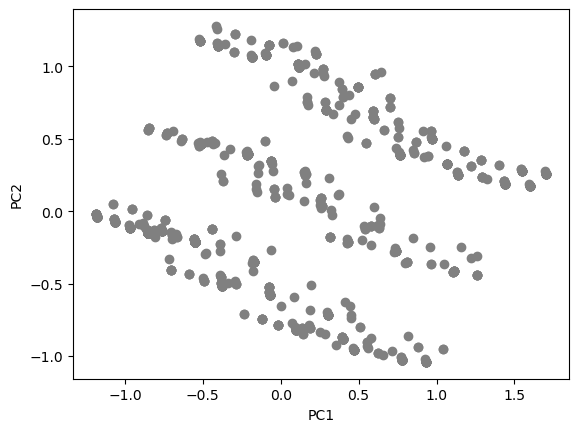

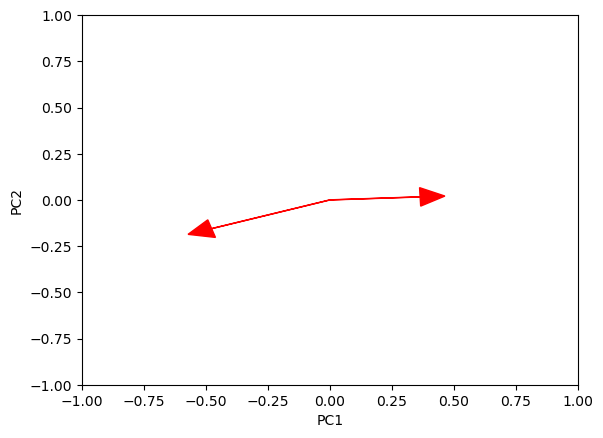

In [9]:
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
proj_axes = pca.components_[:2]  # Take the first two principal components
for axis in proj_axes:
    plt.arrow(0, 0, axis[0], axis[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

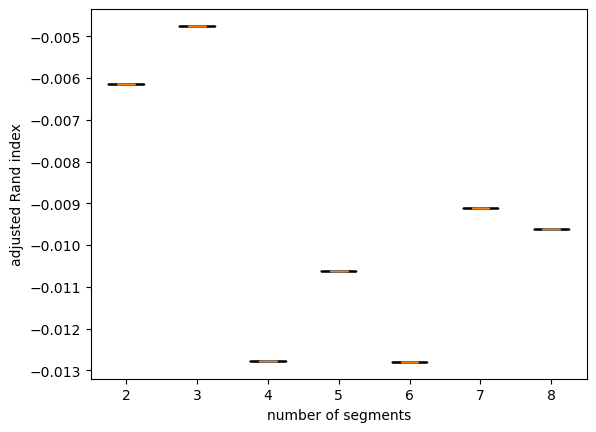

In [10]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
np.random.seed(1234)
MD_x = np.random.rand(100, 2)
nboot = 100
k_range = range(2, 9)
ari_list = []
for _ in range(nboot):
    bootstrap_sample = resample(MD_x, random_state=1234)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=1234)
        labels = kmeans.fit_predict(bootstrap_sample)
        ari = adjusted_rand_score(np.argmax(MD_x, axis=1), labels)
        ari_list.append((k, ari))
ari_array = np.array(ari_list)
plt.boxplot(
    [ari_array[ari_array[:, 0] == k, 1] for k in k_range],
    positions=k_range,
    labels=k_range,
    notch=True,
)
plt.xlabel('number of segments')
plt.ylabel('adjusted Rand index')
plt.show()









In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
np.random.seed(1234)
X = MD_x
k_range = range(2, 9)
best_model = None
best_bic = np.inf
for k in k_range:
    model = GaussianMixture(n_components=k)
    model.fit(X)
    log_likelihood = model.score(X)
    n_features = X.shape[1]
    n_params = (k - 1) + k * n_features + k * n_features * (n_features + 1) / 2
    bic_score = -2 * log_likelihood + n_params * np.log(X.shape[0])
    aic_score = -2 * log_likelihood + 2 * n_params
    icl_score = log_likelihood - 0.5 * n_params * np.log(X.shape[0])
    print(f"Number of components: {k}")
    print(f"Log-likelihood: {log_likelihood}")
    print(f"BIC: {bic_score}")
    print(f"AIC: {aic_score}")
    print(f"ICL: {icl_score}")
    if bic_score < best_bic:
        best_bic = bic_score
        best_model = model


print("Best model:")
print(best_model)

Number of components: 2
Log-likelihood: -0.23453486007038504
BIC: 51.12594176600978
AIC: 22.46906972014077
ICL: -25.56297088300489
Number of components: 3
Log-likelihood: -0.08421977139263413
BIC: 78.45633270458282
AIC: 34.168439542785265
ICL: -39.22816635229141
Number of components: 4
Log-likelihood: -0.022667549485161517
BIC: 105.96424937669644
AIC: 46.04533509897032
ICL: -52.98212468834822
Number of components: 5
Log-likelihood: 0.007442121756433713
BIC: 133.53505115014178
AIC: 57.98511575648713
ICL: -66.76752557507089
Number of components: 6
Log-likelihood: 0.07016661707131852
BIC: 161.04062327544057
AIC: 69.85966676585737
ICL: -80.52031163772028
Number of components: 7
Log-likelihood: 0.1287989530409474
BIC: 188.55437971942987
AIC: 81.7424020939181
ICL: -94.27718985971494
Number of components: 8
Log-likelihood: 0.19254727860975418
BIC: 216.0579041842208
AIC: 93.6149054427805
ICL: -108.0289520921104
Best model:
GaussianMixture(n_components=2)


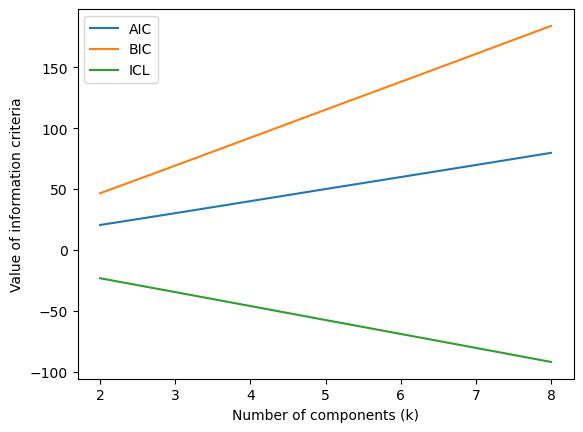

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal

np.random.seed(1234)

# Assuming MD.x is your input data and it's already preprocessed
X = MD_x

# Define the range of k values
k_range = range(2, 9)

results = []

# Iterate over different values of k
for k in k_range:
    # Fit mixture model
    model = GaussianMixture(n_components=k, random_state=1234)
    model.fit(X)
    
    # Calculate log-likelihood
    log_likelihood = model.score(X)
    
    # Calculate number of parameters
    n_features = X.shape[1]
    n_params = k * (n_features + n_features*(n_features+1)//2)
    
    # Calculate AIC and BIC
    aic_score = -2 * log_likelihood + 2 * n_params
    bic_score = -2 * log_likelihood + np.log(X.shape[0]) * n_params
    icl_score = log_likelihood - 0.5 * n_params * np.log(X.shape[0])
    # Store the results
    result = {
        "k": k,
        "AIC": aic_score,
        "BIC": bic_score,
        "ICL":icl_score
    }
    
    results.append(result)

# Plotting the information criteria
aic_values = [result['AIC'] for result in results]
bic_values = [result['BIC'] for result in results]
icl_values = [result['ICL'] for result in results]
plt.plot(k_range, aic_values, label="AIC")
plt.plot(k_range, bic_values, label="BIC")
plt.plot(k_range, icl_values, label="ICL")
plt.xlabel("Number of components (k)")
plt.ylabel("Value of information criteria")
plt.legend()
plt.show()


In [13]:
import pandas as pd
like_counts = data['Like'].value_counts().sort_index(ascending=False)
reversed_table = like_counts.iloc[::-1]
print(reversed_table)


+1              152
+2              187
+3              229
+4              160
-1               58
-2               59
-3               73
-4               71
0               169
I hate it!-5    152
I love it!+5    143
Name: Like, dtype: int64


In [14]:
import pandas as pd

# Subtract the 'Like' values from 6 to create a new column 'Like.n'
data['Like.n'] = 6 - pd.to_numeric(data['Like'], errors='coerce')

# Count the occurrences of each category in the 'Like.n' column
like_n_counts = data['Like.n'].value_counts().sort_index()

# Display the table
print(like_n_counts)


2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: Like.n, dtype: int64
